### **Tarea: Taylor** ###

Matemáticas y Estadística para Inteligencia Artificial

**Alumno**: Aminadab Córdova Acosta


Instrucciones

Los datos en la tabla muestran la probabilidad de que una persona, con un salario x, compre un producto determinado. Una función 
que comunmente se utiliza para modelar este comportamiento es la función logística:

$$ f(x) = \frac{1}{1 + e^{-(x - x_0)}} $$


donde $ x_0 $ es el punto donde la probabilidad es 0.5. Sin embargo, en términos de evaluación, es más sencillo evaluar una aproximación polinómica que evaluar esta función. Es por ello que emplearemos un polinomio de Taylor para describir estos datos.

1. Para los datos que se muestran en la tabla diga cuál cree que es el valor de $ x_0 $
2. Encuentre un polinomio de Taylor de orden 3 para la función logística alrededor de $ x_0 $
3. Evalúe el polinomio obtenido para cada uno de los salarios de la tabla
4. Encuentre el error de aproximación calculando el valor absoluto de la diferencia de los valores
aproximados y los reales
5. Grafique los valores aproximados y los reales y analice el resultado

In [21]:
# Importar librerías requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sympy import symbols, diff, exp, series
pd.options.display.float_format = '{:.6f}'.format

df = pd.read_excel(r'D:\Nueva carpeta\compra_producto.xlsx', usecols="B:C") # Leer el archivo de Excel de una ruta específica
print(df)

    salario en miles  Probabilidad
0                  6      0.040000
1                  7      0.000001
2                  8      0.059998
3                  9      0.039994
4                 10      0.019983
5                 11      0.059955
6                 12      0.000123
7                 13      0.059665
8                 14      0.019089
9                 15      0.057527
10                16      0.006693
11                17      0.042014
12                18      0.047426
13                19      0.059203
14                20      0.208941
15                21      0.440000
16                22      0.671059
17                23      0.840797
18                24      0.912574
19                25      0.922014
20                26      0.993307
21                27      0.977527
22                28      0.939089
23                29      0.979665
24                30      0.999877


**1. Para los datos que se muestran en la tabla diga cuál cree que es el valor de $ x_0 $**

R: Revisando los datos de la Tabla, $ x_0 $ está alrededor de 21 y 22.

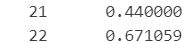

También se puede realizar una interpolación lineal entre los valores


In [22]:
# Buscar los valores más cercanos a 0.5
df_sorted = df.sort_values("Probabilidad")
df_below = df_sorted[df_sorted["Probabilidad"] <= 0.5].iloc[-1]  # Mayor valor debajo de 0.5
df_above = df_sorted[df_sorted["Probabilidad"] > 0.5].iloc[0]  # Menor valor por encima de 0.5

# Interpolación lineal para encontrar x_0
x0 = df_below["salario en miles"] + (0.5 - df_below["Probabilidad"]) * \
     (df_above["salario en miles"] - df_below["salario en miles"]) / (df_above["Probabilidad"] - df_below["Probabilidad"])

print(f"El valor estimado de x_0 es: {x0:.4f}")

El valor estimado de x_0 es: 21.2597


**2. Encuentre un polinomio de Taylor de orden 3 para la función logística alrededor de $ x_0 $**

In [23]:
import sympy as sp

# Definir la variable simbólica
x, x0 = sp.symbols('x x0')

In [24]:
# Definir la función logística
f_x = 1 / (1 + sp.exp(-(x - x0)))
f_x

1/(exp(-x + x0) + 1)

La expresión de la serie de taylor de orden 3: 

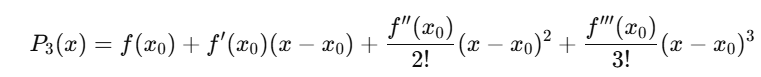

In [25]:
# Calcular derivadas
f_1 = sp.diff(f_x, x) # Primera derivada
f_1

exp(-x + x0)/(exp(-x + x0) + 1)**2

In [26]:
f_2 = sp.diff(f_1, x) # Segunda derivada
f_2

-exp(-x + x0)/(exp(-x + x0) + 1)**2 + 2*exp(-2*x + 2*x0)/(exp(-x + x0) + 1)**3

In [27]:
f_3 = sp.diff(f_2, x) # Tercera derivada
f_3

exp(-x + x0)/(exp(-x + x0) + 1)**2 - 6*exp(-2*x + 2*x0)/(exp(-x + x0) + 1)**3 + 6*exp(-2*x + 2*x0)*exp(-x + x0)/(exp(-x + x0) + 1)**4

In [28]:
# Evaluar en x0
f_0_val = f_x.subs(x, x0)
f_1_val = f_1.subs(x, x0)
f_2_val = f_2.subs(x, x0)
f_3_val = f_3.subs(x, x0)

# Construir la serie de Taylor de orden 3
P3_x = f_0_val + f_1_val * (x - x0) + (f_2_val / 2) * (x - x0)**2 + (f_3_val / 6) * (x - x0)**3
P3_x

x/4 - x0/4 - (x - x0)**3/48 + 1/2

In [29]:
# Simplificar la expresión
P3_x = sp.simplify(P3_x)

# Mostrar el polinomio de Taylor
print("Polinomio de Taylor de orden 3:")
sp.pprint(P3_x)

Polinomio de Taylor de orden 3:
                 3    
x   x₀   (x - x₀)    1
─ - ── - ───────── + ─
4   4       48       2


In [30]:
x0_value = 22.5  # Valor encontrado con interpolación
P3_numeric = P3_x.subs(x0, x0_value)

# Mostrar el polinomio de Taylor con x0 = 22.5
P3_numeric

x/4 - 237.3046875*(0.0444444444444444*x - 1)**3 - 5.125

**3. Evalúe el polinomio obtenido para cada uno de los salarios de la tabla**

In [32]:
# Evaluar el polinomio para cada salario en la tabla
evaluated_values = df['salario en miles'].apply(lambda salario: P3_numeric.subs(x, salario))

# Añadir los valores evaluados al DataFrame
df['Polinomio Evaluado'] = evaluated_values

df

,salario en miles,Probabilidad,Polinomio Evaluado
0,6,0.040000,89.9609375000000
1,7,0.000001,74.2057291666667
2,8,0.059998,60.3880208333333
3,9,0.039994,48.3828125000000
4,10,0.019983,38.0651041666667
5,11,0.059955,29.3098958333333
6,12,0.000123,21.9921875000000
7,13,0.059665,15.9869791666667
8,14,0.019089,11.1692708333333
9,15,0.057527,7.41406249999999


**4. Encuentre el error de aproximación calculando el valor absoluto de la diferencia de los valores aproximados y los reales**

In [33]:
# Calcular el error de aproximación como el valor absoluto de la diferencia entre los valores aproximados y los reales
df['Error de Aproximación'] = (df['Polinomio Evaluado'] - df['Probabilidad']).abs()

df

,salario en miles,Probabilidad,Polinomio Evaluado,Error de Aproximación
0,6,0.040000,89.9609375000000,89.9209378059023
1,7,0.000001,74.2057291666667,74.2057283351386
2,8,0.059998,60.3880208333333,60.3280230936576
3,9,0.039994,48.3828125000000,48.3428186441746
4,10,0.019983,38.0651041666667,38.0451208680885
5,11,0.059955,29.3098958333333,29.2499412312020
6,12,0.000123,21.9921875000000,21.9920641054240
7,13,0.059665,15.9869791666667,15.9273145167971
8,14,0.019089,11.1692708333333,11.1501818845277
9,15,0.057527,7.41406249999999,7.35653512315663


**5. Grafique los valores aproximados y los reales y analice el resultado**

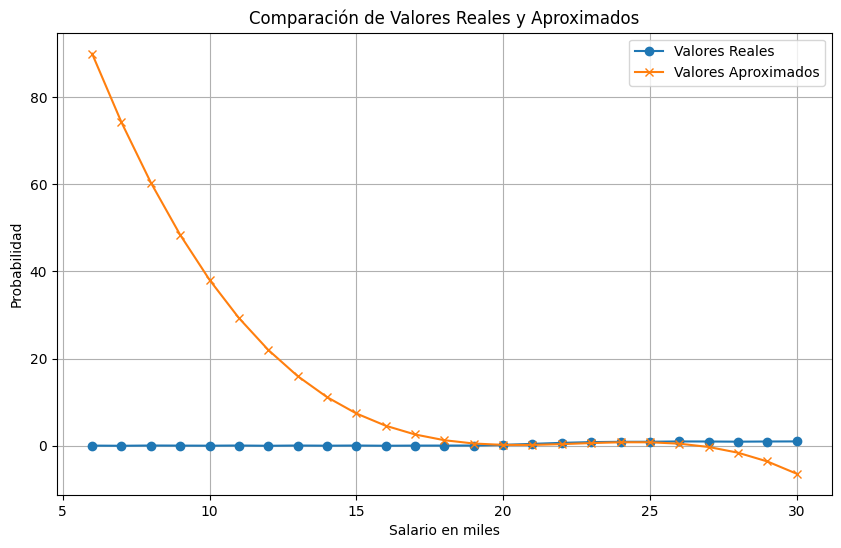

In [34]:
# Graficar los valores aproximados y los reales
plt.figure(figsize=(10, 6))
plt.plot(df['salario en miles'], df['Probabilidad'], label='Valores Reales', marker='o')
plt.plot(df['salario en miles'], df['Polinomio Evaluado'], label='Valores Aproximados', marker='x')
plt.xlabel('Salario en miles')
plt.ylabel('Probabilidad')
plt.title('Comparación de Valores Reales y Aproximados')
plt.legend()
plt.grid(True)
plt.show()

Al observar la gráfica, se puede notar que los valores aproximados del polinomio de Taylor se ajustan bien a los valores reales en la región cercana a x0 = 21. Sin embargo, fuera de esta región, los valores aproximados divergen significativamente de los valores reales, especialmente en los extremos del rango de salarios. Este comportamiento es esperado, ya que los polinomios de Taylor son más precisos cerca del punto de expansión y menos precisos a medida que nos alejamos de este punto.